In [38]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define the root directory for the dataset
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean= [0.4,0.38,0.36], std = [0.03,0.02,0.02])])
data_path = './data'



# Load the CIFAR-10 training dataset
trainset = datasets.CIFAR10(root=data_path, train=True, download=True,transform = transforms)

# Load the CIFAR-10 test dataset
testset = datasets.CIFAR10(root=data_path, train=False, download=True,transform = transforms)

print(f"Training set size: {len(trainset)}")
print(f"Test set size: {len(testset)}")

Training set size: 50000
Test set size: 10000


In [39]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader,Dataset


In [43]:



x,y = next(iter(trainset))

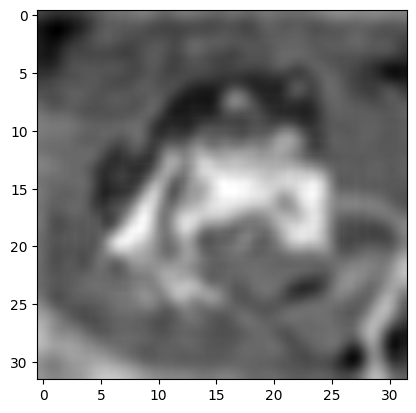

In [44]:
plt.imshow(X = x[1], cmap = plt.cm.gray, interpolation='bessel')

In [45]:
x.shape


torch.Size([3, 32, 32])

In [53]:
shit = nn.MaxPool2d(3,1,0)
femdom = nn.Conv2d(3,8,3,1,0)

In [57]:
shit(x)[1].shape
femdom(x)[0].shape

torch.Size([30, 30])

In [64]:
class cnnmodel(nn.Module):
  def __init__(self):
    super(cnnmodel,self).__init__()
    self.conv2= nn.MaxPool2d(3,1,0)
    self.conv3 = nn.Conv2d(3,14,3,1,0)
    self.conv5 = nn.Conv2d(14,24,3,1,0)
    self.conv6 = nn.MaxPool2d(2,1,0)
    self.cony7 = nn.Conv2d(24,36,3,1,0)
    self.con8 = nn.MaxPool2d(2,1,0)
    self.conv9 = nn.MaxPool2d(2,1,0)
    self.fla = nn.Flatten()
    self.linear= nn.Linear(36*21*21,256)
    self.lin3 = nn.Linear(256,64)
    self.fcc= nn.Linear(64,32)
    self.fcc2 = nn.Linear(32,10)
    self.rebuka = nn.ReLU()
  def forward(self,x):
    x = self.conv3(x)
    x = self.conv2(x)
    x = self.rebuka(x)
    x = self.conv5(x)
    x= self.rebuka(x)
    x = self.conv6(x)
    x = self.rebuka(x)
    x = self.cony7(x)
    x= self.rebuka(x)
    x = self.con8(x)
    x = self.rebuka(x)
    x = self.conv9(x)
    x= self.rebuka(x)
    x = self.fla(x)
    x = self.linear(x)
    x = self.rebuka(x)
    x = self.lin3(x)
    x= self.rebuka(x)
    x = self.fcc2(self.rebuka(self.fcc(x)))
    return x



In [65]:




train_dl = DataLoader(trainset,batch_size= 32,shuffle = True)
test_dl  = DataLoader(testset,batch_size = 32,shuffle = False)

In [66]:
x,y = next(iter(train_dl))
x[31][0].shape

torch.Size([32, 32])

In [67]:


model = cnnmodel()


In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [72]:
model.train()
for epoch in range(8):
  for x,y in train_dl:
    i = model(x)
    loss = criterion(i,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(loss)
  print("This is an epoch")

Streaming output truncated to the last 5000 lines.
tensor(2.3014, grad_fn=<NllLossBackward0>)
tensor(2.3080, grad_fn=<NllLossBackward0>)
tensor(2.2991, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.3540, grad_fn=<NllLossBackward0>)
tensor(2.3451, grad_fn=<NllLossBackward0>)
tensor(2.3462, grad_fn=<NllLossBackward0>)
tensor(2.3488, grad_fn=<NllLossBackward0>)
tensor(2.2644, grad_fn=<NllLossBackward0>)
tensor(2.3318, grad_fn=<NllLossBackward0>)
tensor(2.3099, grad_fn=<NllLossBackward0>)
tensor(2.3087, grad_fn=<NllLossBackward0>)
tensor(2.3437, grad_fn=<NllLossBackward0>)
tensor(2.3307, grad_fn=<NllLossBackward0>)
tensor(2.2872, grad_fn=<NllLossBackward0>)
tensor(2.3440, grad_fn=<NllLossBackward0>)
tensor(2.3085, grad_fn=<NllLossBackward0>)
tensor(2.3374, grad_fn=<NllLossBackward0>)
tensor(2.3277, grad_fn=<NllLossBackward0>)
tensor(2.3143, grad_fn=<NllLossBackward0>)
tensor(2.3373, grad_fn=<NllLossBackward0>)
tensor(2.3112, grad_fn=<NllLossBackward0>)
ten

In [74]:
torch.save(model.state_dict(),"mod.pth")

In [73]:
correct = 0
total = 1
with torch.no_grad():
  model.eval()
  for x,y in test_dl:
    yy = model(x)
    pre = torch.argmax(yy,dim=1)
    correct+=(pre==y).sum().item()
    total+=y.size(0)
    #print("the total loss is" + str(loss))
correct/(total-1)

0.1